In [1]:
import numpy as np

In [2]:
from key_door import key_door_env, visualisation_env
from sac import utils, binary_maze

In [3]:
# Meister maze minimized MDP
tree_depth = 5
S, A = np.sum([2**x for x in range(tree_depth)]), 3

# Transition matrix (binary tree)
P = np.zeros((S, A, S))
for r in range(tree_depth - 1):
    for s in range(2**r):
        P[2**r - 1 + s, 0, 2**(r + 1) - 1 + 2 * s] = 1.0
        P[2**r - 1 + s, 1, 2**(r + 1) - 1 + 2 * s + 1] = 1.0
        if r > 0:
            P[2**r - 1 + s, 2, 2**(r - 1) - 1 + s // 2] = 1.0

# leaf nodes transition to previous level
for s in range(2**(tree_depth - 1)):
    P[2**(tree_depth - 1) - 1 + s, 2, 2**(tree_depth - 2) - 1 + s // 2] = 1.0

# Reward function (only at one leaf - action leading to the goal)
R = np.zeros((S, A))
R[2**(tree_depth - 1) - 1, 0] = 1.0

In [4]:
blocks, label = utils.deterministic_bisimulation(P, R)

In [5]:
blocks

[[0],
 [1],
 [2],
 [3],
 [4],
 [5, 6],
 [7],
 [8],
 [9, 10],
 [11, 12, 13, 14],
 [15],
 [16],
 [17, 18],
 [19, 20, 21, 22],
 [23, 24, 25, 26, 27, 28, 29, 30]]

In [6]:
S, len(blocks)

(np.int64(31), 15)

In [7]:
maze_str, start_pos, reward_pos = binary_maze.generate_maze_from_mdp(tree_depth, P, R)
print(maze_str)

###############################################################
###############################################################
###############################################################
###############################################################
###############################################################
###############################################################
###############################################################
#########   ###########   ###########   ###########  R#########
#########   ###########   ###########   ###########   #########
#########                 ###########                 #########
#########                 ###########                 #########
#########                 ###########                 #########
#########   ####   ####   ###########   ####   ####   #########
#########   ####   ####   ###########   ####   ####   #########
################   #########################   ################
################   #####################

In [8]:
start_pos, reward_pos

((31, 2), (7, 53))

In [9]:
with open("meister_maze.txt", "w") as f:
    f.write(maze_str)

In [10]:
map_path = 'meister_maze.txt'
map_yaml_path = 'meister_maze.yaml'

# map_path = 'square_map.txt'
# map_yaml_path = 'square_map.yaml'

In [11]:
episode_timeout = 1000

In [12]:
env = key_door_env.KeyDoorEnv(map_ascii_path=map_path, map_yaml_path=map_yaml_path, representation="agent_position", episode_timeout=episode_timeout)
env = visualisation_env.VisualisationEnv(env)

In [13]:
env.reset_environment(train=True)

(np.int64(2), np.int64(31), np.int64(0))

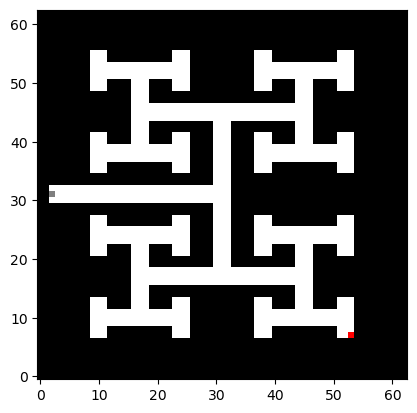

In [14]:
env.render()

In [15]:
state_id_mapping = {state: i for i, state in enumerate(env.positional_state_space)}
id_state_mapping = {i: state for i, state in enumerate(env.positional_state_space)}

In [17]:
S = len(env.positional_state_space)
A = len(env.action_space)

P = np.zeros((S, A, S))
R = np.zeros((S, A))

reward_positions = list(env._env._rewards.keys())

for state in env.positional_state_space:
    state_index = state_id_mapping[state]
    if state not in reward_positions:
        for action in env.action_space:
            # set env and transition
            env.reset_environment(train=True)
            env.move_agent_to(state)
            reward, new_state = env.step(action)
            # import pdb; pdb.set_trace()
            new_state_index = state_id_mapping[new_state[:2]]
            P[state_index][action][new_state_index] = 1
            R[state_index][action] = reward

AttributeError: 'VisualisationEnv' object has no attribute 'move_agent_to'

In [37]:
state_blocks, sa_blocks, state_label, sa_label, P_tilde, R_tilde, action_index_per_block = utils.joint_state_action_abstraction(P, R)

In [38]:
state_blocks

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  1

In [39]:
sa_blocks

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (4, 0),
  (4, 1),
  (4, 2),
  (4, 3),
  (5, 0),
  (5, 1),
  (5, 2),
  (5, 3),
  (6, 0),
  (6, 1),
  (6, 2),
  (6, 3),
  (7, 0),
  (7, 1),
  (7, 2),
  (7, 3),
  (8, 0),
  (8, 1),
  (8, 2),
  (8, 3),
  (9, 0),
  (9, 1),
  (9, 2),
  (9, 3),
  (10, 0),
  (10, 1),
  (10, 2),
  (10, 3),
  (12, 0),
  (12, 1),
  (12, 2),
  (12, 3),
  (13, 0),
  (13, 1),
  (13, 2),
  (13, 3),
  (14, 0),
  (14, 1),
  (14, 2),
  (14, 3),
  (15, 0),
  (15, 1),
  (15, 2),
  (15, 3),
  (16, 0),
  (16, 1),
  (16, 2),
  (16, 3),
  (17, 0),
  (17, 1),
  (17, 2),
  (17, 3),
  (18, 0),
  (18, 1),
  (18, 2),
  (18, 3),
  (19, 0),
  (19, 1),
  (19, 2),
  (19, 3),
  (20, 0),
  (20, 1),
  (20, 2),
  (20, 3),
  (21, 0),
  (21, 1),
  (21, 2),
  (21, 3),
  (22, 0),
  (22, 1),
  (22, 2),
  (22, 3),
  (23, 0),
  (23, 1),
  (23, 2),
  (23, 3),
  (24, 0),
  (24, 1),
  (24,

In [40]:
action_index_per_block

[{np.int64(0): 0}, {np.int64(1): 0}]

In [41]:
state_label

array([0, 0, 0, ..., 0, 0, 0], shape=(1041,))

In [42]:
sa_label

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], shape=(1041, 4))

In [43]:
blocks, label = utils.deterministic_bisimulation(P, R)

In [44]:
len(blocks)

2

In [45]:
label

array([0, 0, 0, ..., 0, 0, 0], shape=(1041,))

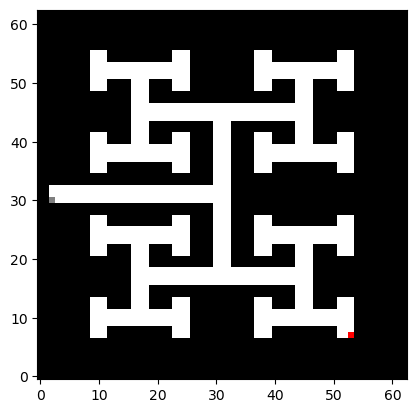

In [46]:
env.render()

In [11]:
env.move_agent_to(env.state_space[0][:2])

In [19]:
env.get_state_representation()[0][0]

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ],
       [0.   , 0.5  , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 0.   ],
       [0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 1.   ,
        1.   , 0.   ],
       [0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
        1.   , 0.   ],
       [0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
        1.   , 0.   ],
       [0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
        1.   , 0.   ],
       [0.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.   ,
        0.299, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   ]])

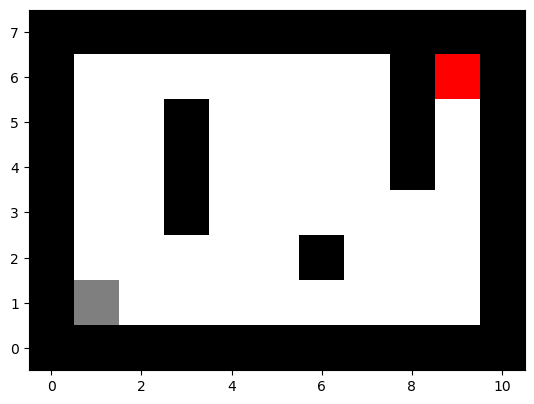

In [12]:
env.render()

In [21]:
import matplotlib.pyplot as plt

In [24]:
env.get_state_representation().shape

(1, 1, 8, 11)

In [30]:
env.state_space[:10]

[(np.int64(1), np.int64(1), 0),
 (np.int64(1), np.int64(1), 1),
 (np.int64(2), np.int64(1), 0),
 (np.int64(2), np.int64(1), 1),
 (np.int64(3), np.int64(1), 0),
 (np.int64(3), np.int64(1), 1),
 (np.int64(4), np.int64(1), 0),
 (np.int64(4), np.int64(1), 1),
 (np.int64(5), np.int64(1), 0),
 (np.int64(5), np.int64(1), 1)]

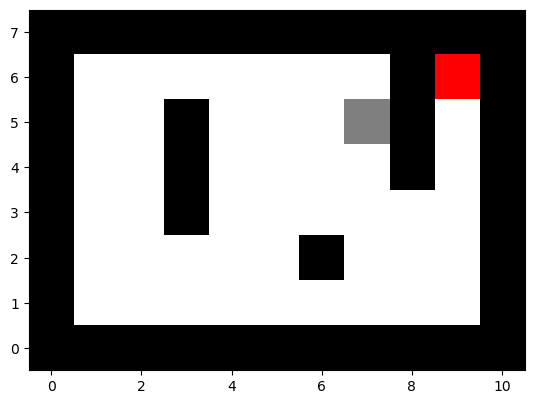

In [28]:
env.render()

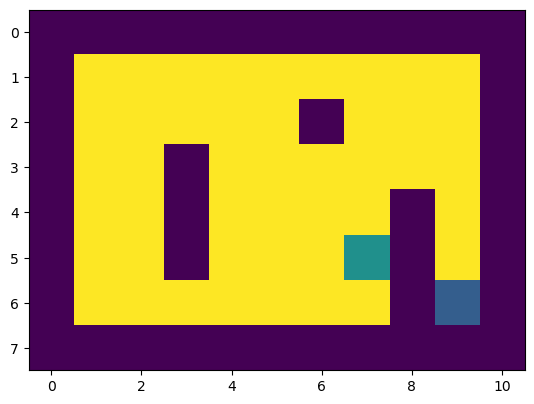

In [26]:
plt.imshow(env.get_state_representation(tuple_state=env.state_space[0])[0][0])